 # <center>DAY 4 - IYKRA</center>
<center><font size="5"><strong>Practice Case 01</strong></font></center>
<center><font size="4"><strong>Initial Data Analysis of German Credit Score Dataset</strong></font></center>
<hr>
<p style="text-align:center"> **Author**</p>
<center>**Joshua Effendi**</center>
<p style="text-align:center"> **Date:**</p>
<center>**24 October 2019**</center>

<font size="3"><strong>Practice Case 1</strong></font></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("https://raw.githubusercontent.com/arikunco/GermanCredit/master/dataset/german_credit_data_with_risk.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [2]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


<font size="2"><strong>Part A</strong></font></center>

**1. How many rows and columns reflected in the dataset?**

In [3]:
print("Rows in data set: {} and Columns in data set: {}".format(df.shape[0],df.shape[1]))

Rows in data set: 1000 and Columns in data set: 10


**2. What is the minimum, maximum, and mean of the customer's age? **

In [4]:
print('Minimum age: {}, Maximum age: {}, Mean age: {}'.format(df.Age.min(),df.Age.max(),df.Age.mean()))

Minimum age: 19, Maximum age: 75, Mean age: 35.546


**3. How many are male and how many are female? Why?**

In [5]:
print('Male: {} and Female: {}'.format(df[df.Sex=='male'].count()['Sex'],df[df.Sex=='female'].count()['Sex']))
print('Why? I don\'t know. But, perhaps due to the most of them are married, maybe the husband bought something for his \
family.')

Male: 690 and Female: 310
Why? I don't know. But, perhaps due to the most of them are married, maybe the husband bought something for his family.


**4. How many high skilled workers customers reflected in the dataset?**

In [6]:
print("High skilled workers: {} \
and Un-skilled workers: {}\
".format(df[df.Job==3].count()['Job'],df[df.Job!=3].count()['Job']))

High skilled workers: 148 and Un-skilled workers: 852


**5. How many customers who own the house? **

In [7]:
print('Customers who owned house: {}'.format(df[df.Housing=='own'].count().Housing))

Customers who owned house: 713


**6. How many customers who have 'rich' Saving accounts?**

In [8]:
print('Customers who had \'rich\' saving accounts: {}'.format(df[df['Saving accounts']=='rich'].count()['Saving accounts']))

Customers who had 'rich' saving accounts: 48


**7. How many customers who do not have checking accounts or have zero checking account?**

In [9]:
print('I don\'t know as the type of the column is string and it has uniques values: {}'.format(df['Checking account'].unique()))

I don't know as the type of the column is string and it has uniques values: ['little' 'moderate' nan 'rich']


But as based on the data of German Credit Data in UCI, the Nan is mark as no checking account. So... < 0DM is == 0DM and Little,  0 <= ... < 200 DM is 0 < ... < 200 DM is also moderate, and >= 200 DM / salary assignments for at least 1 year is rich.

In [10]:
print('The customers who do not have checking accounts: {}, \
the customers who have zero checking accounts: {} \
and both of them: {}'.format(df['Checking account'].isnull().sum(),\
                            df[df['Checking account']=='little'].count()['Checking account'],\
                            df[df['Checking account']=='little'].count()['Checking account']\
                             +df['Checking account'].isnull().sum()))

The customers who do not have checking accounts: 394, the customers who have zero checking accounts: 274 and both of them: 668


**8. Who is the one who have highest credit amount? Show us the profile of the age, sex, job, housing, saving account, and checking account!**

In [11]:
print("Customer characteristic with highest credit amount:")
display(df[df['Credit amount'] == df['Credit amount'].max()]\
        [['Age','Sex','Job','Housing','Saving accounts','Checking account']].reset_index(drop=True))

Customer characteristic with highest credit amount:


,Age,Sex,Job,Housing,Saving accounts,Checking account
0,32,female,3,own,little,moderate


**9. How many customers are classified as good risk and bad risk?**

In [12]:
print('Customers that have good risk: {} and bad risk: {}'\
      .format(df[df.Risk=='good'].count().Risk,df[df.Risk=='bad'].count().Risk))

Customers that have good risk: 700 and bad risk: 300


**10. Is the average of credit amount for good risk is higher than bad risk?**

In [13]:
x = df[df.Risk=='good']['Credit amount'].mean()
y = df[df.Risk=='bad']['Credit amount'].mean()
if x > y:
    print('Yes, as the average credit amount for the good customer is {} and for the bad customer {}'.format(x,y))
elif x < y:
    print('No, as the average credit amount for the good customer is {} and for the bad customer {}'.format(x,y))
else:
    print('No, they have the same average value of credit amount {}'.format(x))

No, as the average credit amount for the good customer is 2985.457142857143 and for the bad customer 3938.1266666666666


***

<font size="2"><strong>Part B</strong></font></center>

**1. Features those had high correlation? How many of them?**

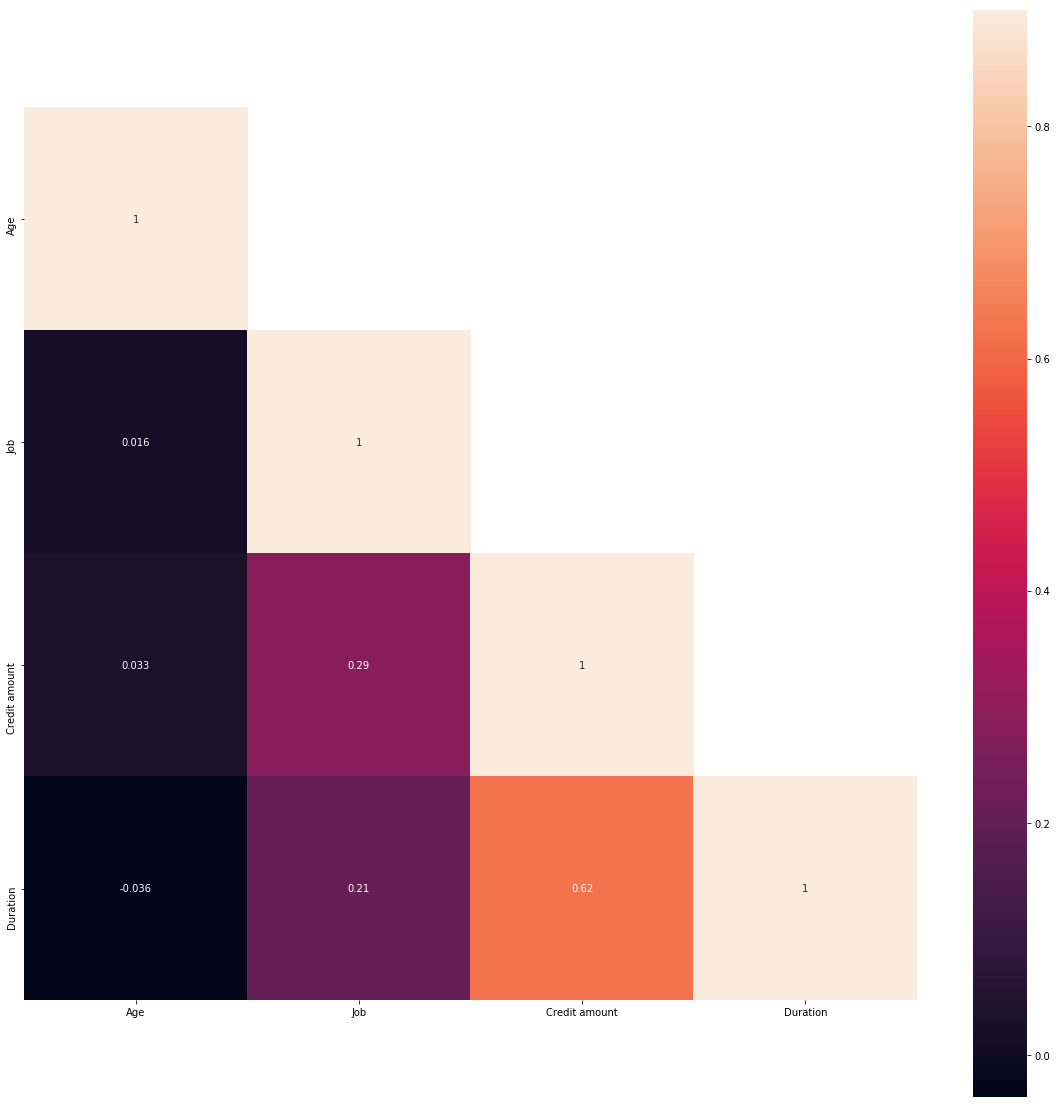

In [14]:
corr = df.corr(method = 'pearson')
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,20)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)
plt.show()

As you see in the heat map, the only variables that are highly correlated to each other are Duration and Credit Amount. As this is normal and make sense as the higher the credit amount the higher the duration of tenor.

**2. Is there any correlation between Age and Risk?**

In [15]:
df_good = df.loc[df["Risk"] == 'good'].sort_values(by=['Age'])['Age'].values.tolist()
df_bad = df.loc[df["Risk"] == 'bad'].sort_values(by=['Age'])['Age'].values.tolist()
df_age = df['Age'].values.tolist()

trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)

trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)

trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

As you can see in the graphic, there is no correlation between age and risk.

**3. Is there any correlation between purpose and risk?**

In [16]:
df_good = df.loc[df["Risk"] == 'good'].sort_values(by=['Purpose'])['Purpose'].values.tolist()
df_bad = df.loc[df["Risk"] == 'bad'].sort_values(by=['Purpose'])['Purpose'].values.tolist()
df_age = df['Purpose'].values.tolist()

trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)

trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)

trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Purpose"
)

fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Purpose Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

There is no correlation as we see in the graph.

**4. Is there any correlation between owning a house and risk?**

In [17]:
trace0 = go.Bar(
    x = df[df["Risk"]== 'good']["Housing"].value_counts().index.values,
    y = df[df["Risk"]== 'good']["Housing"].value_counts().values,
    name='Good credit'
)

trace1 = go.Bar(
    x = df[df["Risk"]== 'bad']["Housing"].value_counts().index.values,
    y = df[df["Risk"]== 'bad']["Housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

There is no correlation between owning a house and not to be good and bad customer.

**5. Is there any correlation between saving account and risk?**

In [18]:
trace0 = go.Bar(
    x = df[df["Risk"]== 'good']["Saving accounts"].value_counts().index.values,
    y = df[df["Risk"]== 'good']["Saving accounts"].value_counts().values,
    name='Good credit Distribuition'
)

trace1 = go.Bar(
    x = df[df["Risk"]== 'bad']["Saving accounts"].value_counts().index.values,
    y = df[df["Risk"]== 'bad']["Saving accounts"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Saving Account Distribuition'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

There is no correlation in between saving accounts of customers and their risk.

**6. Is there any correlation between checking account and risk?**

In [19]:
trace0 = go.Bar(
    x = df[df["Risk"]== 'good']["Checking account"].value_counts().index.values,
    y = df[df["Risk"]== 'good']["Checking account"].value_counts().values,
    name='Good credit Distribuition'
)

trace1 = go.Bar(
    x = df[df["Risk"]== 'bad']["Checking account"].value_counts().index.values,
    y = df[df["Risk"]== 'bad']["Checking account"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Checking Account Distribuition'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

There is no correlation between checking account and risk.

**7. Is there any correlation between saving accounts with risk and jobs?**

Description of Distribuition Saving accounts by Risk and Jobs:  


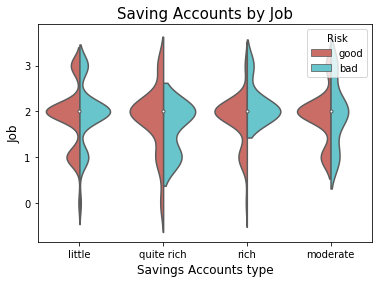

In [20]:
print("Description of Distribuition Saving accounts by Risk and Jobs:  ")

g = sns.violinplot(x="Saving accounts", y="Job", data=df, palette="hls", 
               hue = "Risk",split=True)
g.set_title("Saving Accounts by Job", fontsize=15)
g.set_xlabel("Savings Accounts type", fontsize=12)
g.set_ylabel("Job", fontsize=12)

plt.show()

No correlation between them, but as the graph explains the rich with job 1 and 0 are at certainty are bad customer.

**8. Is there any correlation between saving accounts, risk, and credit amounts?**

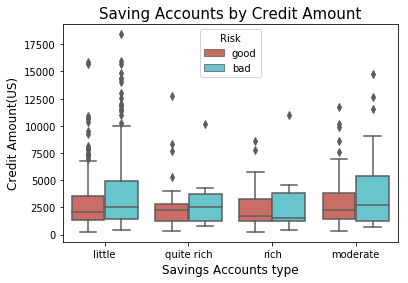

In [21]:
g = sns.boxplot(x="Saving accounts", y="Credit amount", data=df,
            hue = "Risk",palette="hls")
g.set_title("Saving Accounts by Credit Amount", fontsize=15)
g.set_xlabel("Savings Accounts type", fontsize=12)
g.set_ylabel("Credit Amount(US)", fontsize=12)

plt.show()

There is no correlation between them.

**9. Is there any correlation between installment and ?**

In [22]:
df['Installment'] = df['Credit amount'] / df['Duration']

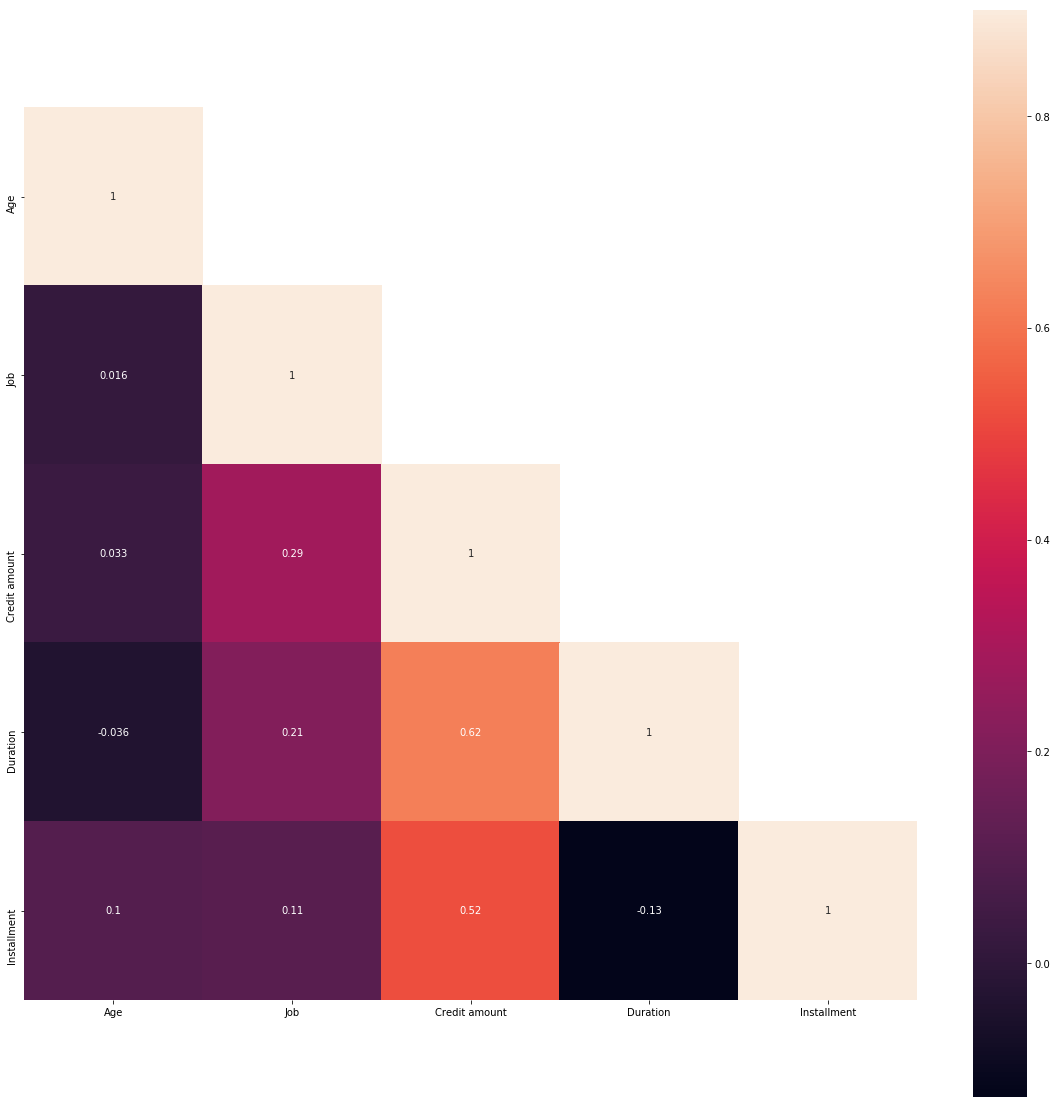

In [23]:
corr = df.corr(method = 'pearson')
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,20)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)
plt.show()

There is only one correlation between installment that is credit amount, as it makes sense as the higher the credit amount the higher the installment.

**10. Is there any correlation between Installment with Risk?**

In [24]:
df_good = df.loc[df["Risk"] == 'good'].sort_values(by=['Installment'])['Installment'].values.tolist()
df_bad = df.loc[df["Risk"] == 'bad'].sort_values(by=['Installment'])['Installment'].values.tolist()
df_age = df['Installment'].values.tolist()

trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)

trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)

trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Installment"
)

fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Installment Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

***

<font size="2"><strong>Part C</strong></font></center>

<font size="2"><strong>Business Problems</strong></font></center>

<strong>
1. Calculate interest rate for each customers
2. Calculate the features stability index to the time
3. Clean data as the data had Nan
</strong>